# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

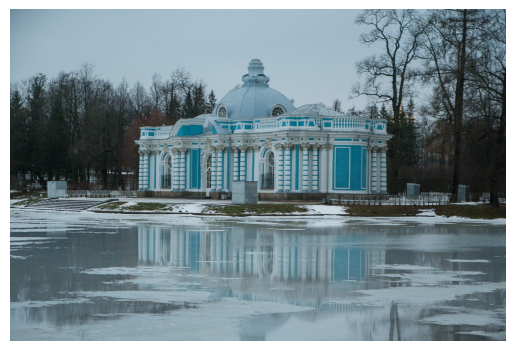

In [18]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


# Путь к изображению
img_path = '/Users/muzafarov/Desktop/MyEducation/ML_OE/spb_barocco.jpg'

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [19]:
np.mean(img)

121.34155988366433

Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [20]:
img = img/255
img

array([[[0.44313725, 0.54509804, 0.61176471],
        [0.44705882, 0.54901961, 0.61568627],
        [0.44313725, 0.54901961, 0.61568627],
        ...,
        [0.35294118, 0.44313725, 0.50588235],
        [0.3372549 , 0.42745098, 0.49019608],
        [0.21176471, 0.30196078, 0.36470588]],

       [[0.43137255, 0.53333333, 0.6       ],
        [0.43921569, 0.54117647, 0.60784314],
        [0.43921569, 0.54509804, 0.61176471],
        ...,
        [0.43921569, 0.52941176, 0.59215686],
        [0.4745098 , 0.56470588, 0.62745098],
        [0.38039216, 0.47058824, 0.53333333]],

       [[0.42352941, 0.5254902 , 0.59215686],
        [0.42745098, 0.53333333, 0.6       ],
        [0.43529412, 0.54117647, 0.60784314],
        ...,
        [0.31764706, 0.40784314, 0.4627451 ],
        [0.51764706, 0.60784314, 0.6627451 ],
        [0.38431373, 0.4745098 , 0.52941176]],

       ...,

       [[0.47058824, 0.56078431, 0.61568627],
        [0.47058824, 0.56078431, 0.61568627],
        [0.47058824, 0

In [21]:
np.mean(img)

0.47584925444574244

Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [22]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [23]:
img.shape[0]

856

In [24]:
img.reshape(img.shape[0]*img.shape[1], img.shape[2]).shape

(1095680, 3)

In [9]:
plot_pixels(img.reshape(img.shape[0]*img.shape[1], img.shape[2]), colors=np.reshape(new_img, (1249280, 3)))

NameError: name 'new_img' is not defined

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [25]:
from sklearn.cluster import MiniBatchKMeans

In [26]:
model_norm = MiniBatchKMeans(n_clusters=16, random_state=10).fit(img.reshape(img.shape[0]*img.shape[1], img.shape[2]))

/Users/muzafarov/anaconda3/envs/ML_OE/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1930: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [27]:
model_norm.cluster_centers_

array([[0.31137667, 0.4886174 , 0.55299888],
       [0.65354332, 0.74241068, 0.79212347],
       [0.12757482, 0.14568599, 0.13661517],
       [0.3174961 , 0.38428343, 0.40840558],
       [0.47706991, 0.56832614, 0.60711406],
       [0.06922739, 0.39054295, 0.47360343],
       [0.57111154, 0.65991544, 0.70174899],
       [0.18319356, 0.20963424, 0.20418576],
       [0.42756183, 0.51001417, 0.54270307],
       [0.37097173, 0.44238946, 0.46968945],
       [0.76319505, 0.82403612, 0.85413829],
       [0.52561521, 0.61631872, 0.65734742],
       [0.07152775, 0.09075365, 0.08444243],
       [0.22892963, 0.27986361, 0.29286578],
       [0.61226125, 0.70071356, 0.74554653],
       [0.27467162, 0.33775871, 0.35966056]])

In [28]:
clusters = model_norm.cluster_centers_

In [29]:
reshaped_img = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

In [30]:
reshaped_img[0].reshape(1, -1)

array([[0.44313725, 0.54509804, 0.61176471]])

In [31]:
reshaped_img.shape

(1095680, 3)

In [32]:
new_img = []
for pixel in reshaped_img:
    cls = model_norm.predict(pixel.reshape(1, -1))
    new_img.append(clusters[cls])

KeyboardInterrupt: 

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [61]:
np.mean(np.reshape(new_img, (1249280, 3)))

0.5535525514224224

Выберите номер изображения, соответствующего палитре из $16$ цветов.

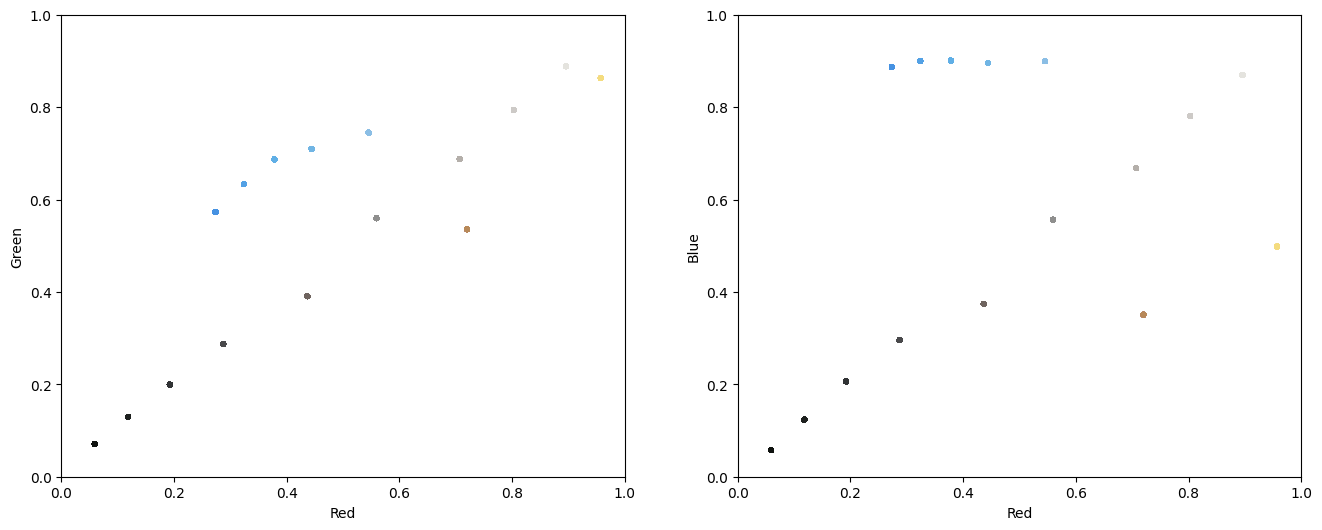

In [59]:
plot_pixels(np.reshape(new_img, (1249280, 3)))

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

In [34]:
reshaped_img

array([[0.34117647, 0.60392157, 0.88235294],
       [0.3372549 , 0.6       , 0.87843137],
       [0.33333333, 0.59607843, 0.8745098 ],
       ...,
       [0.33333333, 0.41568627, 0.52156863],
       [0.42352941, 0.50196078, 0.6       ],
       [0.42352941, 0.49019608, 0.59215686]])

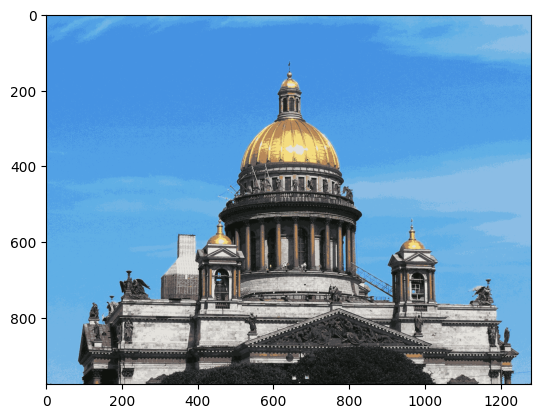

In [65]:
plt.imshow(np.reshape(new_img, img.shape))

In [55]:
img.shape

(976, 1280, 3)

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

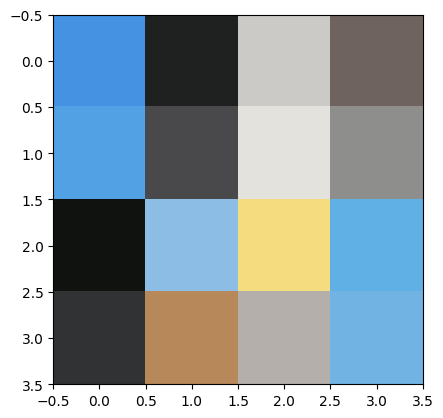

In [64]:
plt.imshow(clusters.reshape(4, 4, 3))

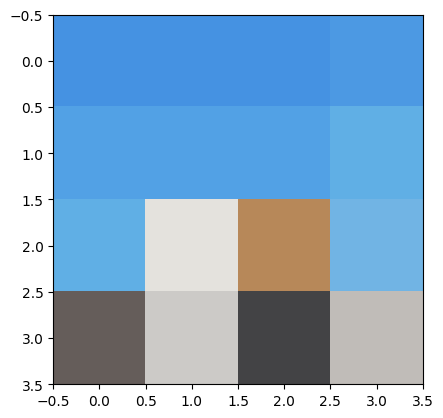

In [67]:
plt.imshow((cv2.resize(np.reshape(new_img, img.shape), 
           (4, 4))))